## RNN (Using Autoregressive Multiple-Step Approch)

* Predict future steps recursively using model’s previous output as input.

* Feedback loop is used where predictions become inputs for the next step. 

In [10]:
import pandas as pd
import numpy as np

# Load the training and testing datasets
train_data = pd.read_csv('TE1.csv')
test_data = pd.read_csv('TR1.csv')

# Check the column names and structure
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

# Normalize `IP Delay (ms)` in the training data if not already normalized
if 'Normalized IP Delay' not in train_data.columns:
    min_train = train_data['IP Delay (ms)'].min()
    max_train = train_data['IP Delay (ms)'].max()
    train_data['Normalized IP Delay'] = (train_data['IP Delay (ms)'] - min_train) / (max_train - min_train)

if 'Normalized IP Delay' not in test_data.columns:
    min_test = test_data['IP Delay (ms)'].min()
    max_test = test_data['IP Delay (ms)'].max()
    test_data['Normalized IP Delay'] = (test_data['IP Delay (ms)'] - min_test) / (max_test - min_test)

print("Training Data Head:\n", train_data.head())
print("Testing Data Head:\n", test_data.head())

Training Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Testing Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Training Data Head:
      SN  IP Delay (ms)  Normalized IP Delay
0  9001      20.951986             0.839265
1  9002      20.885944             0.827640
2  9003      20.895958             0.829402
3  9004      20.812035             0.814630
4  9005      20.740986             0.802124
Testing Data Head:
    SN  IP Delay (ms)  Normalized IP Delay
0   1      20.129919             0.709040
1   2      19.016027             0.510940
2   3      19.000053             0.508099
3   4      17.980814             0.326832
4   5      20.273924             0.734651


In [11]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])  # Sequence of delays
        y.append(data[i+sequence_length])   # Target value (next step)
    return np.array(X), np.array(y)

# Define sequence length (number of previous steps to consider)
sequence_length = 10  # Adjust as needed

# Generate sequences for training data
train_values = train_data['Normalized IP Delay'].values
X_train, y_train = create_sequences(train_values, sequence_length)

# Reshape training input for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add feature dimension

# Generate sequences for testing data
test_values = test_data['Normalized IP Delay'].values
X_test, y_test = create_sequences(test_values, sequence_length)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Display the shapes of training and testing datasets
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (3490, 10, 1)
y_train Shape: (3490,)
X_test Shape: (8990, 10, 1)
y_test Shape: (8990,)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),  # RNN layer with 50 units
    Dense(1)  # Output layer for predicting one value
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use Mean Squared Error as the loss function
model.summary()


c:\ML\PYTHON\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0473 - val_loss: 0.0133
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0082
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0064
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - val_lo

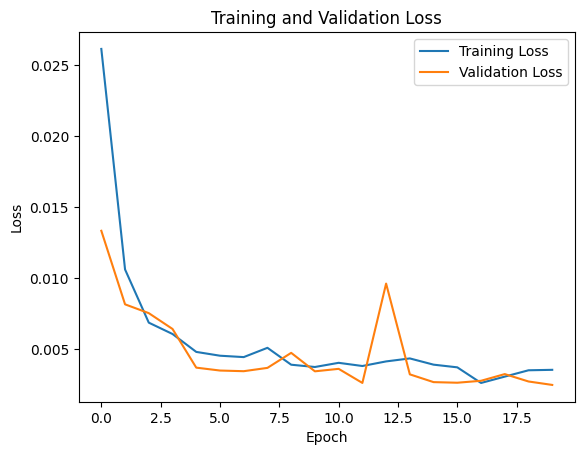

In [13]:
# Train the RNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# Multi-step iterative prediction
def multi_step_prediction(initial_sequence, model, future_steps):
    current_sequence = initial_sequence
    predicted_delays = []

    for _ in range(future_steps):
        # Predict the next delay
        next_delay = model.predict(current_sequence.reshape(1, current_sequence.shape[0], 1))
        predicted_delays.append(next_delay.flatten()[0])  # Save prediction

        # Update the sequence: remove oldest value and append new prediction
        current_sequence = np.append(current_sequence[1:], next_delay).reshape(-1, 1)

    return predicted_delays

# Select the starting sequence (Here We have used last sequence in X_test)
starting_sequence = X_test[-1]

# Number of future steps to predict
future_steps = 10

# Perform multi-step prediction
predicted_delays = multi_step_prediction(starting_sequence, model, future_steps)
print("Predicted delays for future steps:", predicted_delays)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted delays for future steps: [np.float32(0.80227625), np.float32(0.8384031), np.float32(0.8081862), np.float32(0.8060236), np.float32(0.7961565), np.float32(0.78347903), np.float32(0.76954156), np.float32(0.76060796), np.float32(0.75172156), np.float32(0.7415901)]


In [15]:
# Denormalize predictions
denormalized_predictions = (np.array(predicted_delays) * (test_data['IP Delay (ms)'].max() - test_data['IP Delay (ms)'].min())) + test_data['IP Delay (ms)'].min()
print("Denormalized Predicted Delays:", denormalized_predictions)


Denormalized Predicted Delays: [20.65417365 20.85731002 20.68740433 20.67524446 20.61976326 20.54847945
 20.47011094 20.4198785  20.3699115  20.31294358]


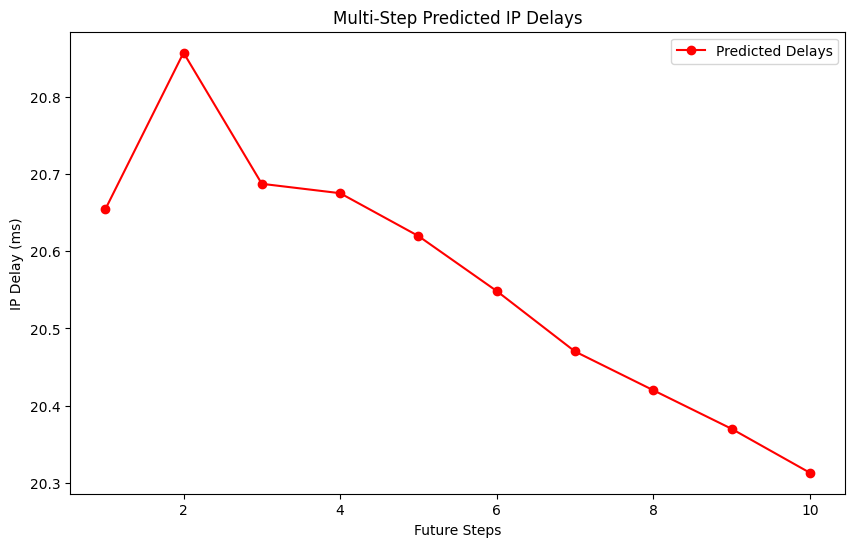

In [16]:
import matplotlib.pyplot as plt

# Plot predicted delays
plt.figure(figsize=(10, 6))
plt.plot(range(1, future_steps + 1), denormalized_predictions, marker='o', label='Predicted Delays', color='red')
plt.title('Multi-Step Predicted IP Delays')
plt.xlabel('Future Steps')
plt.ylabel('IP Delay (ms)')
plt.legend()
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
      SN  Actual IP Delay (ms)  Predicted IP Delay (ms)  \
99   100             19.852877                19.891089   
100  101             19.824982                19.829423   
101  102             19.694090                19.763427   
102  103             19.695997                19.683920   
103  104             19.565105                19.620392   
..   ...                   ...                      ...   
195  196             18.800974                18.859062   
196  197             18.805981                18.784573   
197  198             18.645048                18.722376   
198  199             18.691063                18.643112   
199  200             18.541813                18.586106   

     Absolute Difference (ms)  
99                   0.038212  
100                  0.004442  
101                  0.069337  
102                  0.012077  
103                  0.055286  
..                        ...  
195                  0.058

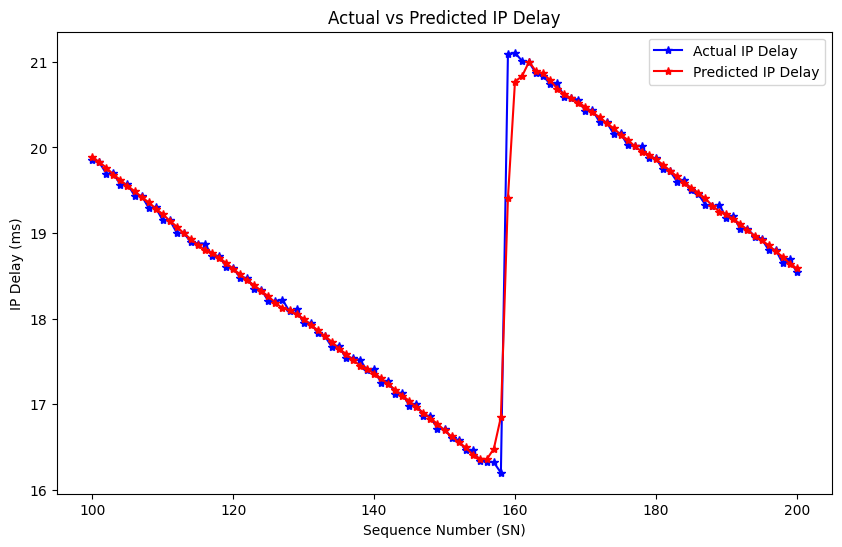

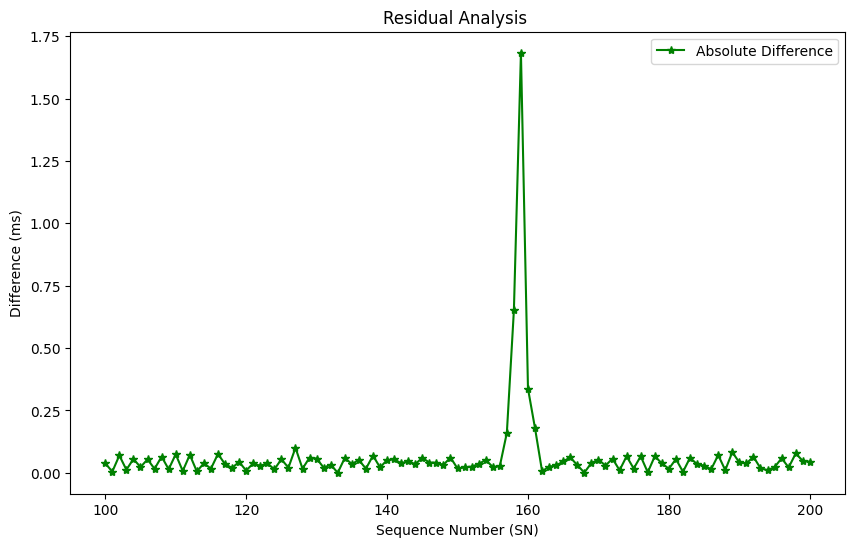

In [20]:
# Predict for all sequences in testing data
predictions = model.predict(X_test)

# Denormalize predictions
min_test = test_data['IP Delay (ms)'].min()
max_test = test_data['IP Delay (ms)'].max()
denormalized_predictions = (predictions.flatten() * (max_test - min_test)) + min_test

# Extract actual values and denormalize them
denormalized_actual = (y_test * (max_test - min_test)) + min_test

# Create a comparison table
comparison_df = pd.DataFrame({
    'SN': range(1, len(denormalized_actual) + 1),
    'Actual IP Delay (ms)': denormalized_actual,
    'Predicted IP Delay (ms)': denormalized_predictions,
    'Absolute Difference (ms)': abs(denormalized_actual - denormalized_predictions)
})

# Filter comparison_df for SN of your choice
filtered_df = comparison_df[(comparison_df['SN'] >=100) & (comparison_df['SN'] <=200)]

# Print filtered comparison
print(filtered_df)

# Optional: Save the comparison table to a CSV file
comparison_df.to_csv('comparison_results.csv', index=False)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Actual IP Delay (ms)'], label='Actual IP Delay', marker='*',color='blue')
plt.plot(filtered_df['SN'], filtered_df['Predicted IP Delay (ms)'], label='Predicted IP Delay', marker='*', color='red')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('IP Delay (ms)')
plt.title('Actual vs Predicted IP Delay')
plt.legend()
plt.show()

# Plot Residuals (Absolute Difference)
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Absolute Difference (ms)'], label='Absolute Difference', marker='*',color='green')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('Difference (ms)')
plt.title('Residual Analysis ')
plt.legend()
plt.show()


Residual Statistical Summary (SN 100–200):
 count    600.000000
mean       0.112327
std        0.476395
min        0.000105
25%        0.018427
50%        0.037595
75%        0.060194
max        4.711203
Name: Absolute Difference (ms), dtype: float64


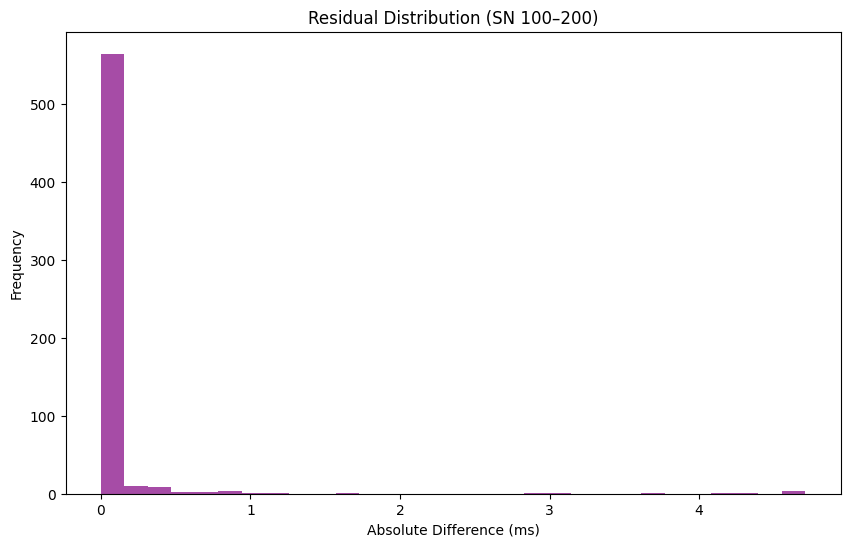

In [18]:
# Print residual stats for filtered range
residual_stats_filtered = filtered_df['Absolute Difference (ms)'].describe()
print("Residual Statistical Summary (SN 100–200):\n", residual_stats_filtered)

# Histogram of residuals for SN 100–200
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Absolute Difference (ms)'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Absolute Difference (ms)')
plt.ylabel('Frequency')
plt.title('Residual Distribution (SN 100–200)')
plt.show()


# PLOTS

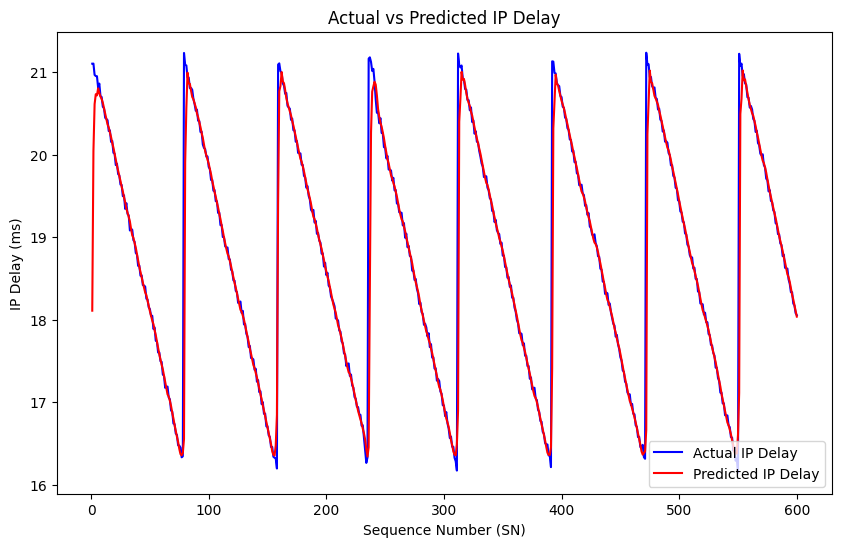

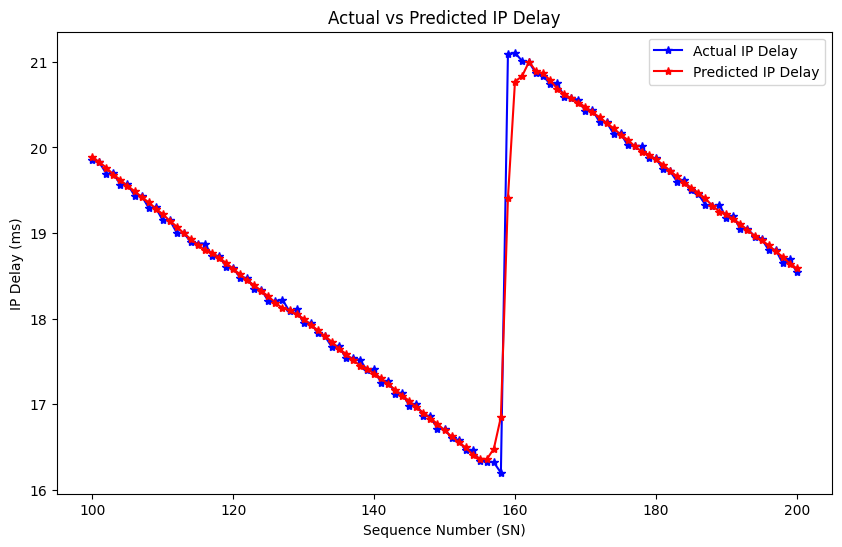

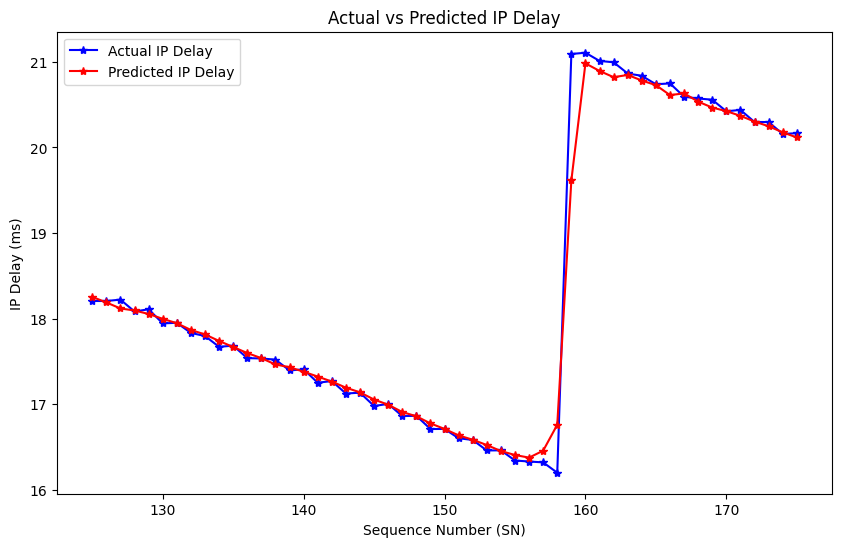